In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from scipy.stats import zscore

In [75]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [76]:
df.shape

(7043, 21)

In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

SeniorCitizen and tenure are int, monthly charges is float type and remaining all object type.

Finding null values

In [79]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null value found in dataset

Finding unique value in columns

In [80]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
TotalCharges 6531
Churn 2


Male      3555
Female    3488
Name: gender, dtype: int64


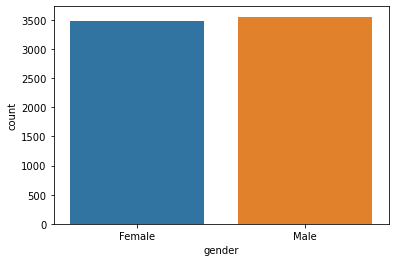

In [81]:
#Using countplot for nominal data
sns.countplot(x='gender',data=df)
print(df['gender'].value_counts())

It can be clearly seen from plot that both male and female customer are almost eqaul propertion.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


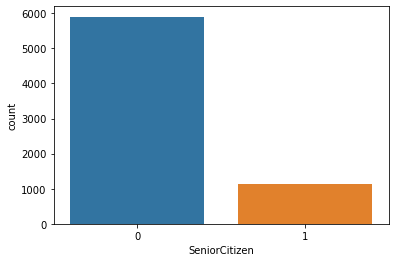

In [82]:
sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

Senior citizen customer proportion are less comapred to other

No     3641
Yes    3402
Name: Partner, dtype: int64


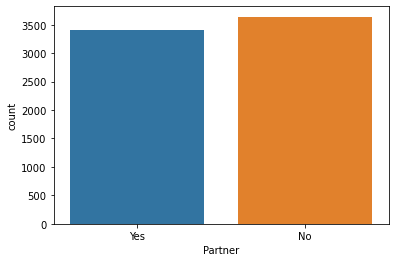

In [83]:
sns.countplot(x='Partner', data=df)
print(df['Partner'].value_counts())

Around 3402 customers have a partner and 3641 customers do not have a partner.

No     4933
Yes    2110
Name: Dependents, dtype: int64


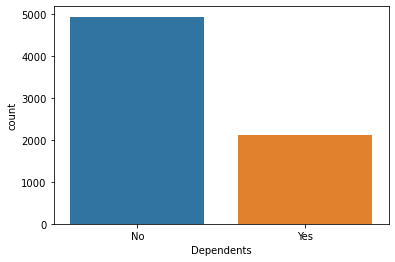

In [84]:
sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

Depedent customer are less compared with customer are not dependent

Yes    6361
No      682
Name: PhoneService, dtype: int64


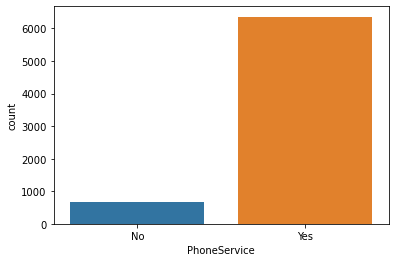

In [85]:
sns.countplot(x='PhoneService', data=df)
print(df['PhoneService'].value_counts())

Only few number people are not using phone service if campared with people who are using phone services

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


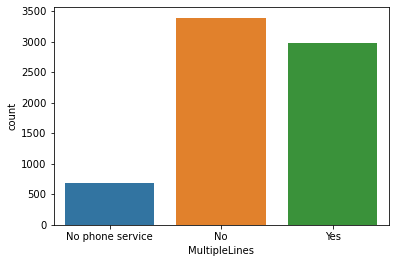

In [86]:
sns.countplot(x='MultipleLines', data=df)
print(df['MultipleLines'].value_counts())

People with no multiple lines are slightly higher than people with multiple lines and very few people are have no phone services.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


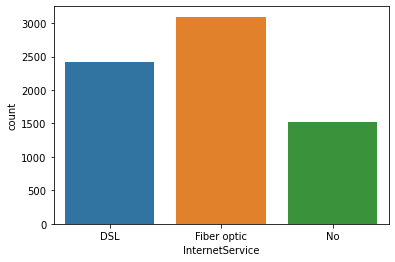

In [87]:
sns.countplot(x='InternetService', data=df)
print(df['InternetService'].value_counts())

fiber optic internet service are more popular among people if campared with DSL and around 1500 people are not using internet service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


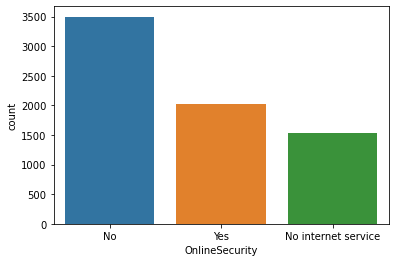

In [88]:
sns.countplot(x='OnlineSecurity', data=df)
print(df['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


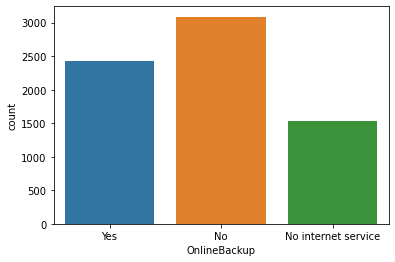

In [89]:
sns.countplot(x='OnlineBackup', data=df)
print(df['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


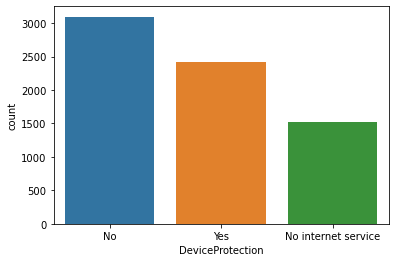

In [90]:
sns.countplot(x='DeviceProtection', data=df)
print(df['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


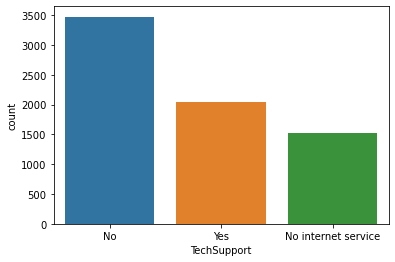

In [91]:
sns.countplot(x='TechSupport', data=df)
print(df['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


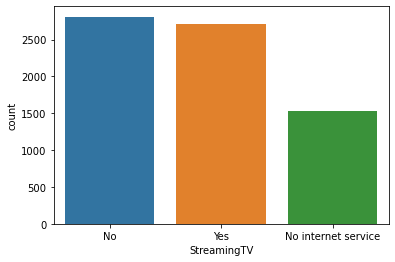

In [92]:
sns.countplot(x='StreamingTV', data=df)
print(df['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


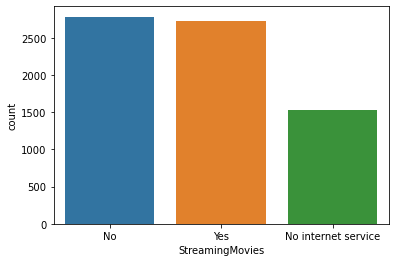

In [93]:
sns.countplot(x='StreamingMovies', data=df)
print(df['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


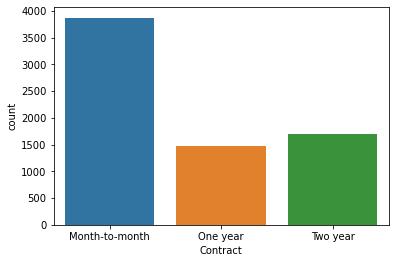

In [94]:
sns.countplot(x='Contract', data=df)
print(df['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


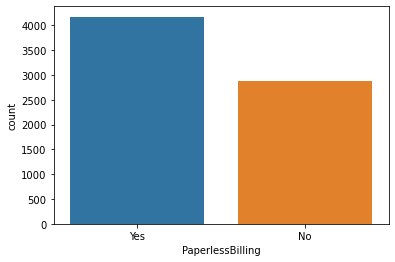

In [95]:
sns.countplot(x='PaperlessBilling', data=df)
print(df['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


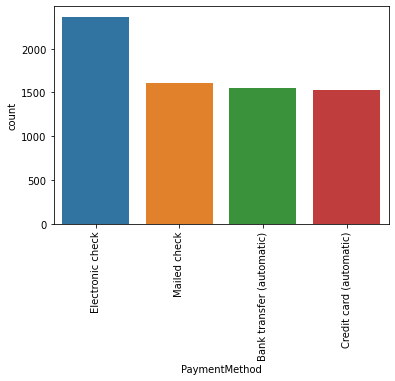

In [96]:
sns.countplot(x='PaymentMethod', data=df)
plt.xticks(rotation=90)
print(df['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


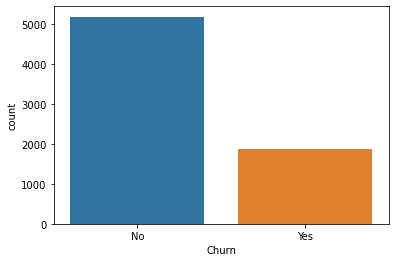

In [97]:
sns.countplot(x='Churn', data=df)
print(df['Churn'].value_counts())

In [98]:
#lets check for empty spaces
df.TotalCharges.value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
6033.1      1
1046.1      1
1992.95     1
3358.65     1
6448.85     1
Name: TotalCharges, Length: 6531, dtype: int64

In [99]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [100]:
#lets replace white spaces with nan values
df.TotalCharges.replace(' ',np.nan,inplace=True)

In [101]:
#now we have 11 nan values
df.TotalCharges.isnull().sum()

11

In [102]:
#we can see that the data right skewed in this column, so lets replace it with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [103]:
#Lets convert this into float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

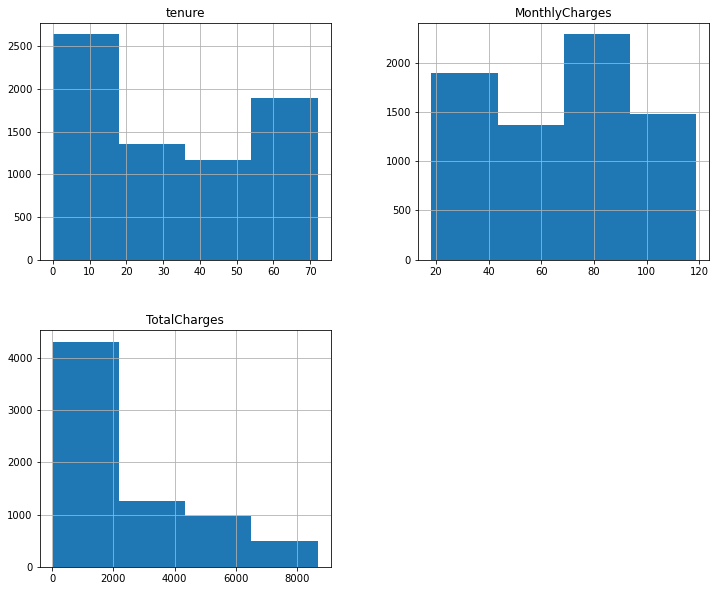

In [104]:
df.hist(column=['tenure','MonthlyCharges','TotalCharges'],bins=4, figsize=(12,10))

Label Encoding

In [105]:
#Label encoding objects variables
from sklearn.preprocessing import LabelEncoder
cols = ['Churn'] 
label = LabelEncoder()
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


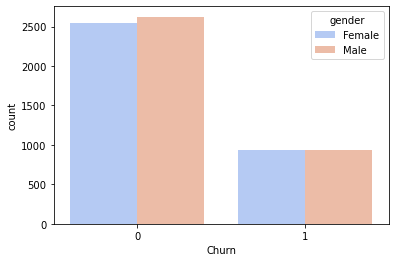

In [106]:
sns.countplot(df['Churn'], palette='coolwarm', hue='gender', data=df)
plt.show()

Both male and female churn is equal.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


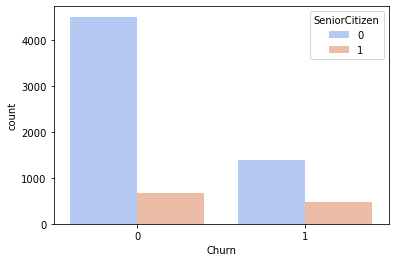

In [107]:
sns.countplot(df['Churn'], palette='coolwarm', hue='SeniorCitizen', data=df)
plt.show()

Senior citizen churn is low compared to others.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


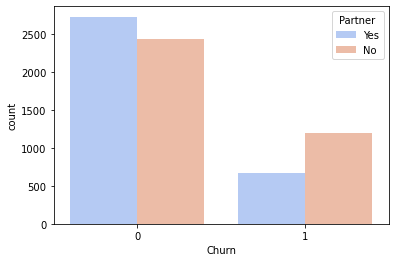

In [108]:
sns.countplot(df['Churn'], palette='coolwarm', hue='Partner', data=df)
plt.show()

Customers without partner have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


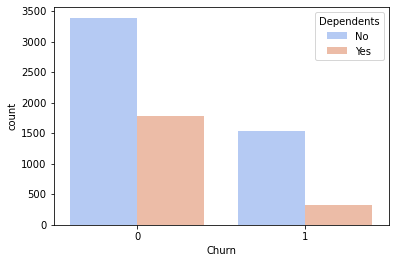

In [109]:
sns.countplot(df['Churn'], palette='coolwarm', hue='Dependents', data=df)
plt.show()

Customers with dependents have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


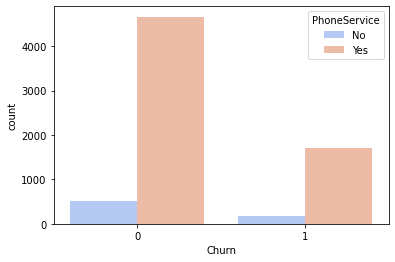

In [110]:
sns.countplot(df['Churn'], palette='coolwarm', hue='PhoneService', data=df)
plt.show()

Customers with phoneservice have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


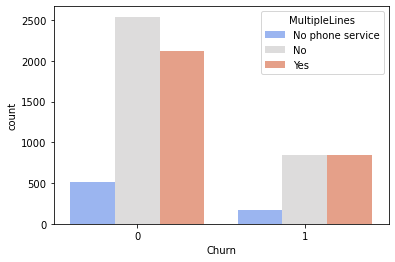

In [111]:
sns.countplot(df['Churn'], palette='coolwarm', hue='MultipleLines', data=df)
plt.show()

Customers with and without Multiplelines have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


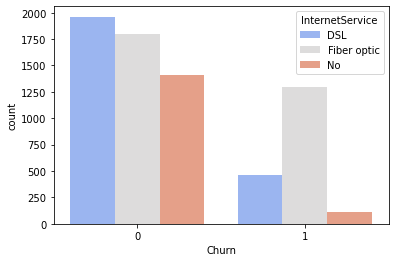

In [112]:
sns.countplot(df['Churn'], palette='coolwarm', hue='InternetService', data=df)
plt.show()

Customers with Fiber optic have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


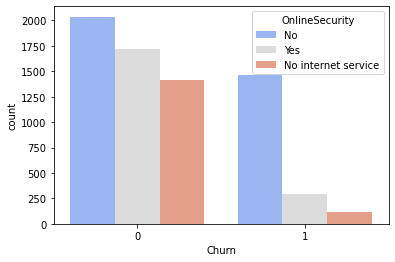

In [113]:
sns.countplot(df['Churn'], palette='coolwarm', hue='OnlineSecurity', data=df)
plt.show()

Customers with no online security have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


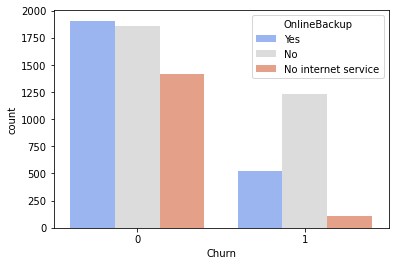

In [114]:
sns.countplot(df['Churn'], palette='coolwarm', hue='OnlineBackup', data=df)
plt.show()

Customers with no onlinebackup have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


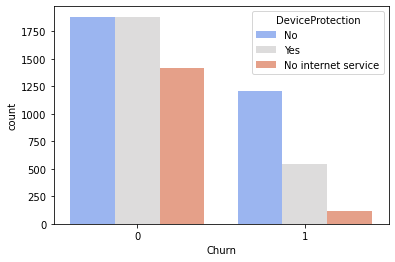

In [115]:
sns.countplot(df['Churn'], palette='coolwarm', hue='DeviceProtection', data=df)
plt.show()

Customers with no Device Protection have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


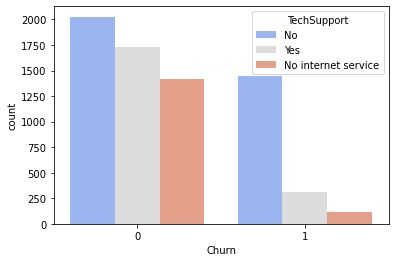

In [116]:
sns.countplot(df['Churn'], palette='coolwarm', hue='TechSupport', data=df)
plt.show()

Customers with no TechSupport have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


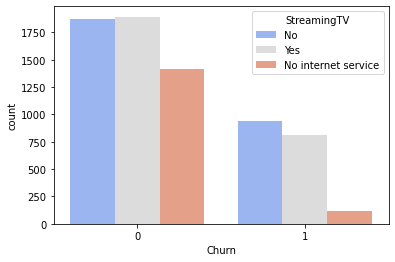

In [117]:
sns.countplot(df['Churn'], palette='coolwarm', hue='StreamingTV', data=df)
plt.show()

Customers who doesnt stream in TV have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


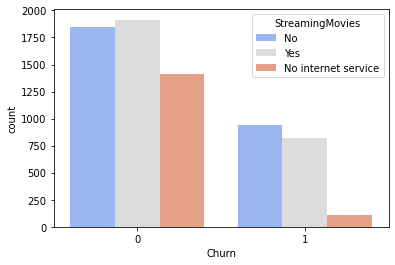

In [118]:
sns.countplot(df['Churn'], palette='coolwarm', hue='StreamingMovies', data=df)
plt.show()

Customers who doesnt stream Movies have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


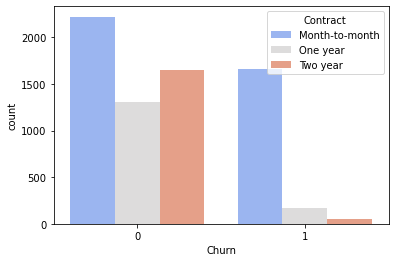

In [119]:
sns.countplot(df['Churn'], palette='coolwarm', hue='Contract', data=df)
plt.show()

Customers who have Month-to-Month contract have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


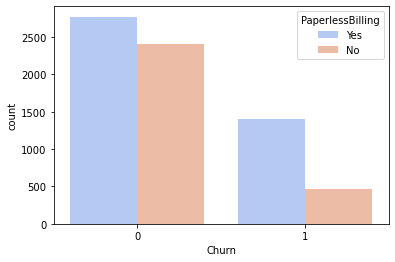

In [120]:
sns.countplot(df['Churn'], palette='coolwarm', hue='PaperlessBilling', data=df)
plt.show()

Customers with paperlessbilling have high churn.

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


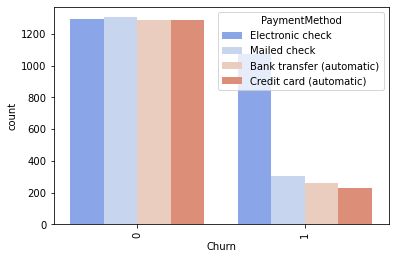

In [121]:
sns.countplot(df['Churn'], palette='coolwarm', hue='PaymentMethod', data=df)
plt.xticks(rotation=90)
plt.show()

Customers with Electronic check payment method have high churn.

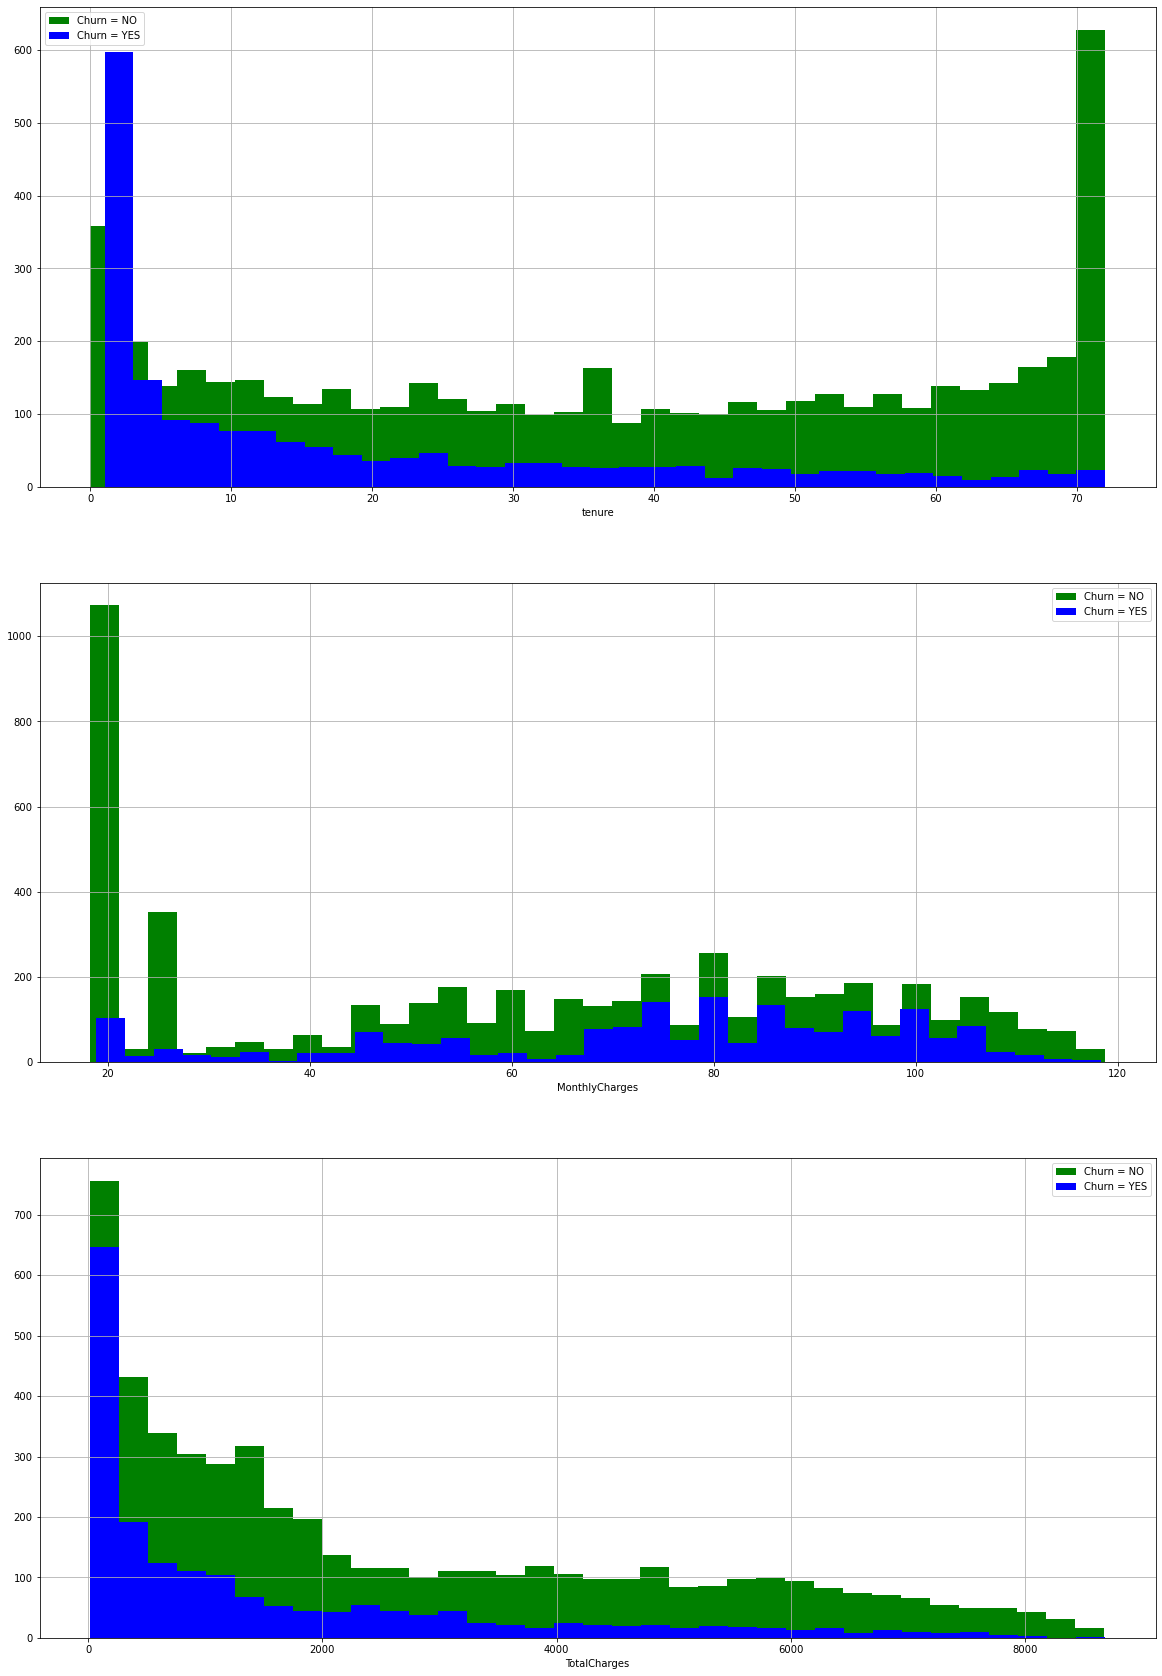

In [122]:
plt.figure(figsize=(20, 30))
df_cont=['tenure','MonthlyCharges', 'TotalCharges']
for i, column in enumerate(df_cont, 1):
    plt.subplot(3, 1, i)
    df[df["Churn"] == 0][column].hist(bins=35, color='green', label='Churn = NO', alpha=1)
    df[df["Churn"] == 1][column].hist(bins=35, color='blue', label='Churn = YES', alpha=1)
    plt.legend()
    plt.xlabel(column)

In [123]:
#Remove the unnecessary column customerID
df = df.drop('customerID', axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [124]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [125]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000


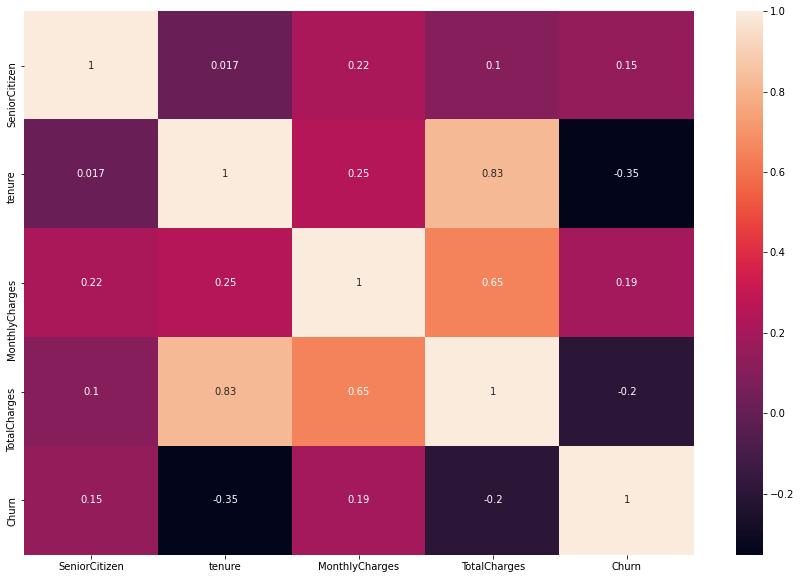

In [126]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

Data Preprocessing

In [128]:
collist = ['gender','Partner', 'Dependents','PhoneService', 'PaperlessBilling']
o_encoding = OrdinalEncoder()

for i in collist:
    if df[i].dtypes == 'object':
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

In [129]:
df_new = pd.get_dummies(data = df, columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'])

In [130]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,1.0,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1.0,0,0.0,0.0,34,1.0,0.0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1.0,0,0.0,0.0,2,1.0,1.0,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1.0,0,0.0,0.0,45,0.0,0.0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0.0,0,0.0,0.0,2,1.0,1.0,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Outlier Removal for Numerical Columns

In [131]:
Numerical_columns = ['tenure','MonthlyCharges', 'TotalCharges']

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x`

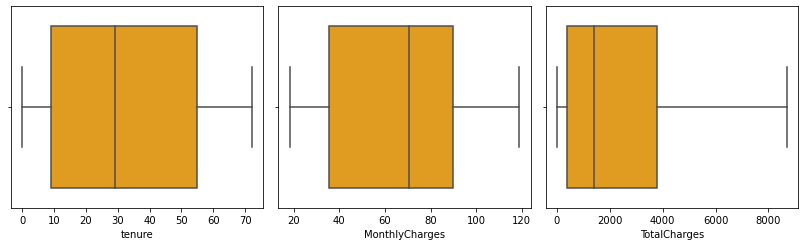

In [132]:
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

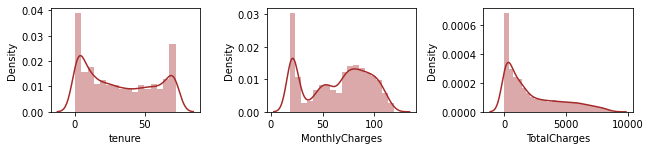

In [133]:
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[collist[i]],color='brown')
    plt.tight_layout()

Skewness Reduction

In [134]:
for i in Numerical_columns:
    print(i, df_new[i].skew())

tenure 0.2395397495619829
MonthlyCharges -0.22052443394398033
TotalCharges 0.9637890936414893


In [135]:
#lets use sqaureroot transformation method to reduce skewness of this column
df_new['TotalCharges']= np.sqrt(df_new['TotalCharges'])

In [136]:
df_new['TotalCharges'].skew()

0.30983834186805154

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


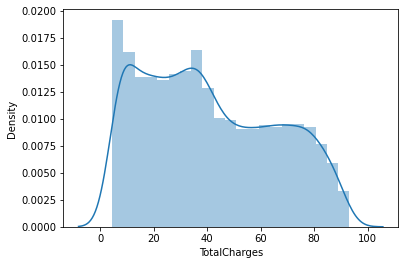

In [137]:
sns.distplot(df_new['TotalCharges'])
plt.show()

Data is almost normal

Splitting X and Y columns

In [138]:
y = df_new['Churn']
x = df_new.drop('Churn',axis = 1)

In [139]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [141]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Lets Check for Best Random State

In [143]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.22,random_state=i,stratify= y_sm)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best accuracy is 0.8607817303469477 n Random_state 71


In [144]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= 51, stratify= y_sm )

In [145]:
y_train.value_counts()

1    4036
0    4035
Name: Churn, dtype: int64

In [146]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

In [147]:

least_diffrence = []
for m in models:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    difference = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'difference b/w accurancy score and cross val score is : {:.2f}'.format(difference)
    print(a)
    least_diffrence.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[983 156]
 [176 962]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1139
           1       0.86      0.85      0.85      1138

    accuracy                           0.85      2277
   macro avg       0.85      0.85      0.85      2277
weighted avg       0.85      0.85      0.85      2277

The accuracy of LogisticRegression() is 0.8541941150636803


C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prabhat Chauhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

cross val score : 0.8289656605562211
difference b/w accurancy score and cross val score is : 0.03
f1 score for 0 is 0.855526544821584 
f1 score for 1 is 0.8528368794326242 


SVC()
[[824 315]
 [200 938]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1139
           1       0.75      0.82      0.78      1138

    accuracy                           0.77      2277
   macro avg       0.78      0.77      0.77      2277
weighted avg       0.78      0.77      0.77      2277

The accuracy of SVC() is 0.7738252086078173
cross val score : 0.7500979025550862
difference b/w accurancy score and cross val score is : 0.02
f1 score for 0 is 0.7619047619047619 
f1 score for 1 is 0.7846089502300294 


GaussianNB()
[[787 352]
 [144 994]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1139
           1       0.74      0.87      0.80      1138

    accuracy                           0.78      

In [148]:
least_diffrence

[(LogisticRegression(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (SVC(), 'difference b/w accurancy score and cross val score is : 0.02'),
 (GaussianNB(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (DecisionTreeClassifier(),
  'difference b/w accurancy score and cross val score is : 0.04'),
 (KNeighborsClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (RandomForestClassifier(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (AdaBoostClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (GradientBoostingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (BaggingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02')]

Hyperparameter Tuning

In [149]:
KNN_parameters={'n_neighbors':np.arange(1, 16),
            'weights':('uniform', 'distance'),
            'algorithm':('auto','ball_tree','kd_tree','brute')}

In [150]:
KNN=GridSearchCV(KNeighborsClassifier(),KNN_parameters,cv=5)

In [151]:
KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'weights': ('uniform', 'distance')})

In [152]:
KNN.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}

In [153]:
KNN.best_score_

0.8329831466924473

Creating a Final Model as KNeighborsClassifier

In [154]:
final_model = KNeighborsClassifier(algorithm='auto',n_neighbors=1,weights='uniform')
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((final_model,diffrence))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[ 872  267]
 [  62 1076]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1139
           1       0.80      0.95      0.87      1138

    accuracy                           0.86      2277
   macro avg       0.87      0.86      0.85      2277
weighted avg       0.87      0.86      0.85      2277

The accuracy of KNeighborsClassifier(n_neighbors=1) is 0.8555116381203338


cross val score : 0.8494421212142438


diffrence b/w accurancy score and cross val score is : 0.006069516906090033
f1 score for 0 is 0.8412928123492522 
f1 score for 1 is 0.8673921805723498 


Save Model

In [155]:
final_model.score(x_train,y_train)

0.9986370957749969

In [156]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]

In [158]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

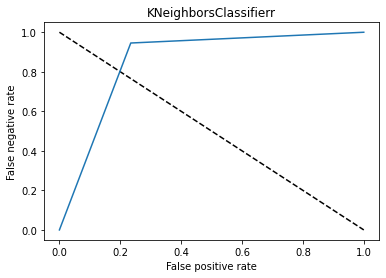

In [159]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Decision Tree Classifer')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('KNeighborsClassifierr')
plt.show()

In [160]:
roc_auc_score(pred,y_test)

0.8674051031520407

We have roc_auc_score of 86